In [347]:
import numpy as np
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt

Import data

In [348]:
train_data = pd.read_csv("h5w7_pr1_power_train.csv")
test_data = pd.read_csv("h5w7_pr1_power_test.csv")

In [349]:
train_data.insert(0, 'b', np.ones(train_data.shape[0]))
test_data.insert(0, 'b', np.ones(test_data.shape[0]))
X_train, y_train = train_data.iloc[:,:5].to_numpy(), train_data["PE"].to_numpy()
X_test, y_test = train_data.iloc[:,:5].to_numpy(), train_data["PE"].to_numpy()


Shuffle data

In [350]:
#Shuffle the trainning data
random.seed(4)
idx = np.arange(len(X_train))
random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

Tranform x to argument space

Initialization

In [351]:
def predict(w,x):
    return np.dot(w,x)

def eta(i,A,B):
    return A/(B+i)

In [352]:
epoch           = 100
N               = X_train.shape[0]
A               = [0.01, 0.1, 1, 10, 100]
B               = [1, 10, 100, 1000]
w_init          = np.random.uniform(-0.1, 0.1, 5)
J_init          = np.sum(np.power(predict(w_init,X_train.T) - y_train, 2))/N
error_rms       = np.zeros((len(A),len(B),epoch))
final_w         = np.zeros((len(A),len(B),5))
exploding_gd    = np.zeros((len(A),len(B)))

In [353]:
for (a,b) in itertools.product(np.arange(0,len(A)),np.arange(0,len(B)), repeat=1):
    error_rms[a,b,0]    = np.power(J_init, 0.5)
    final_w[a,b]        = w_init
error_rms[2,0,0]

454.1585767502748

a) Code a linear MSE regressor that uses iterative GD for optimization 

In [354]:
class increasedloss(Exception): pass

for (a,b) in itertools.product(np.arange(0,len(A)),np.arange(0,len(B)), repeat=1):
# for (a,b) in itertools.product([4],[3], repeat=1):
    w = w_init
    J = J_init
    J_prev = J
    print("start with pair A = ",A[a], " and B =", B[b])
    try:
        for e in range(1,100):
            for n in range(N):
                i = (e-1)*N + n
                w = w - eta(i,A[a],B[b])*(predict(w,X_train[n])-y_train[n])*X_train[n]
                # print(w, "\n")
                J = np.sum(np.power(predict(w,X_train.T) - y_train, 2))/N
                # print(J)
                if(J > 1000*J_prev):
                    exploding_gd[a,b] = 1
                    print("The loss is not decresingly converged, learning rate is too big")
                    raise increasedloss()
                J_prev  = J
            error_rms[a,b,e] = np.power(J, 0.5)
            if(error_rms[a,b,e] < 0.001*error_rms[a,b,0]):
                final_w[a,b] = w
                print("halting condition 1 is met")
                break
        final_w[a,b] = w
        print("halting condition 2 is met")
    except increasedloss:
        pass

start with pair A =  0.01  and B = 1
halting condition 2 is met
start with pair A =  0.01  and B = 10
halting condition 2 is met
start with pair A =  0.01  and B = 100
halting condition 2 is met
start with pair A =  0.01  and B = 1000
halting condition 2 is met
start with pair A =  0.1  and B = 1
halting condition 2 is met
start with pair A =  0.1  and B = 10
halting condition 2 is met
start with pair A =  0.1  and B = 100
halting condition 2 is met
start with pair A =  0.1  and B = 1000
halting condition 2 is met
start with pair A =  1  and B = 1
halting condition 2 is met
start with pair A =  1  and B = 10
halting condition 2 is met
start with pair A =  1  and B = 100
halting condition 2 is met
start with pair A =  1  and B = 1000
halting condition 2 is met
start with pair A =  10  and B = 1
The loss is not decresingly converged, learning rate is too big
start with pair A =  10  and B = 10
halting condition 2 is met
start with pair A =  10  and B = 100
halting condition 2 is met
star

In [355]:
def hw5_plot(A,a):
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(np.arange(0,100), error_rms[a,0,:])
    axs[0, 0].set_title('(A,B) = ('+str(A[a])+', 1)')
    axs[0, 1].plot(np.arange(0,100), error_rms[a,1,:])
    axs[0, 1].set_title('(A,B) = ('+str(A[a])+', 10)')
    axs[1, 0].plot(np.arange(0,100), error_rms[a,2,:])
    axs[1, 0].set_title('(A,B) = ('+str(A[a])+', 100)')
    axs[1, 1].plot(np.arange(0,100), error_rms[a,3,:])
    axs[1, 1].set_title('(A,B) = ('+str(A[a])+', 1000)')
    for ax in axs.flat:
        ax.set(xlabel='x-label', ylabel='y-label')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

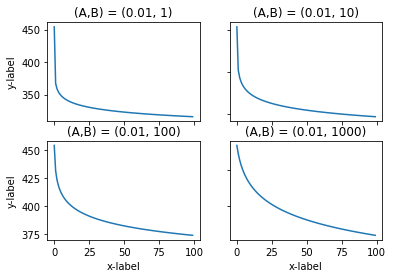

In [356]:
hw5_plot(A,0)

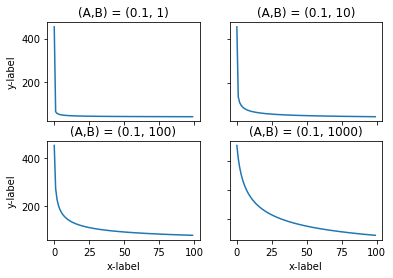

In [310]:
hw5_plot(A,1)

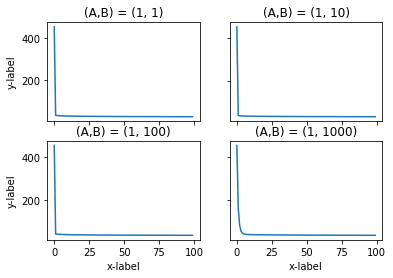

In [311]:
hw5_plot(A,2)

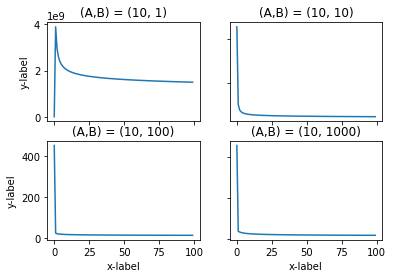

In [312]:
hw5_plot(A,3)

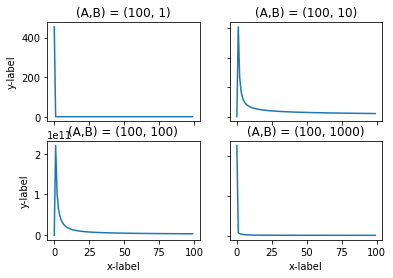

In [313]:
hw5_plot(A,4)

Comment on above figure: The case when (A,B) = (100,1) is memory exceed doe to large J because of large learning rate => exploding weight vector

c) Comment: 
- When A increase, the speed of halting is faster due to larger learning rate. But if A is too big in compare with B, the gradient with raise instead of decrease as learning rate is too big.
- When B increase, the learning rate is decrease which make convergence is slower

d) Pick the resulting best pair (𝐴, 𝐵) from (b) above and use its value of 𝑤_hat to calculate the 𝐸_rms error on the test set

The best pair of (A,B) = (100,1000) based on last rms error

In [339]:
J_test = np.sum(np.power(predict(w,X_test.T) - y_test, 2))/X_test.shape[0]
error_rms_test = np.power(J_test, 0.5)
error_rms_test #not in dB

4.668997751158805

In [340]:
error_rms_test_db = 10*np.log10(error_rms_test)
error_rms_test_db

6.692236647512049

e) As a comparison, consider a trivial regressor that always outputs y_hat(x): = y_bar = {mean value of the outputs over the training data}. Calculate the 𝐸_rms of this trivial regressor on the test set.

In [345]:
y_mean = np.mean(y_train) 
J_mean_test = np.sum(np.power(y_mean - y_test, 2))/X_test.shape[0]
error_rms_mean = np.power(J_mean_test, 0.5)
error_rms_mean #not in dB_test

16.54072952844987

In [346]:
error_rms_mean_db = 10*np.log10(error_rms_mean)
error_rms_mean_db

12.185546601858855

Yes, it is lower than the error of this trivial regressor but not substantially lower